# Importation des packages

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import models
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

import random
import os
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil

# Paludisme

Le paludisme est une maladie parasitaire potentiellement mortelle causée par une infection par un protozoaire Plasmodium transmis par un moustique anophèle femelle infectieux.

Le modèle suivant tente de distinguer les cellules infectées par le paludisme de celles qui ne le sont pas.

Répartition de ce exo :

* Chargement de l'ensemble de données : chargez les données et importez les bibliothèques.

* Prétraitement des données :
Lire les images, étiquettes stockées dans 2 dossiers (Parasitisés, Non infectés).

* Afficher les images non infectées et parasitées avec leurs étiquettes respectives.
* Normalisation des données d'image.
* Division des données en test, entrainnement et validation
d'ImageDataGenerator
* Création et formation du modèle
: créez un modèle cnn avec la bibliothèque  KERAS.

* Évaluation : affichez  les métriques d’évaluation et tracer la courbe de validation.



Chargement des données

In [4]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import pandas as pd
import numpy as np
import cv2
import random

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

def prep_dataset(X,y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

examinez quelques exemples de cellules parasitées et non infectées.

In [6]:
root="./cell_images/"
para="Parasitized/"
uninf="Uninfected/"

In [7]:
Parasitized = os.listdir(root+para)
Uninfected = os.listdir(root+uninf)

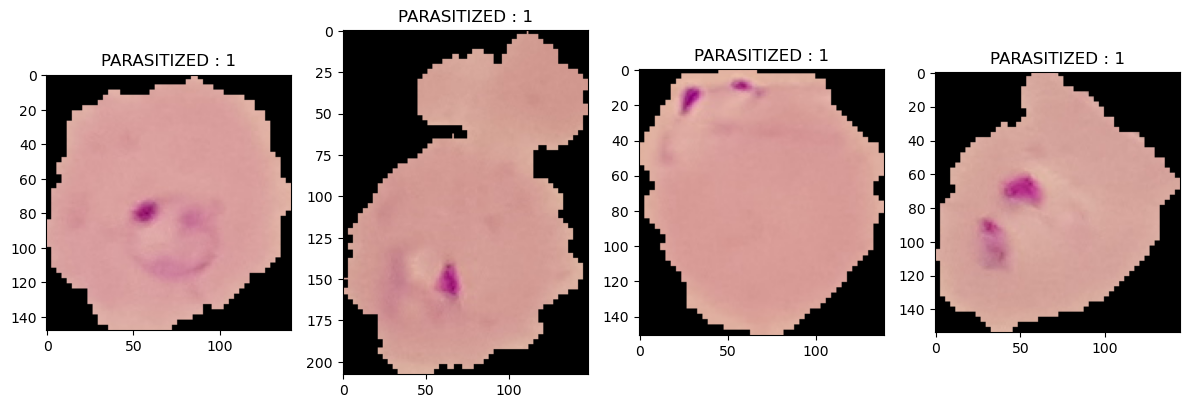

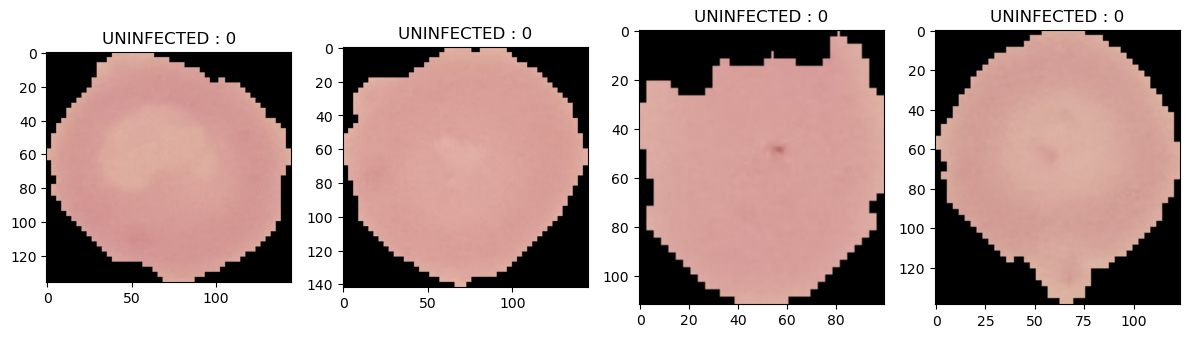

In [8]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(root+para+ Parasitized[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(2, 4, i+1)
    img = cv2.imread(root+uninf+ Uninfected[i+1])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

Les images sont redimensionnées et converties en tableaux avant d'être ajoutées dans une seule liste

In [9]:
data = []
labels = []

for img in Parasitized:
    try:
        img_read = plt.imread(root+para+ img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None

for img in Uninfected:
    try:
        img_read = plt.imread(root+uninf+ img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None


##### Visualiser des données

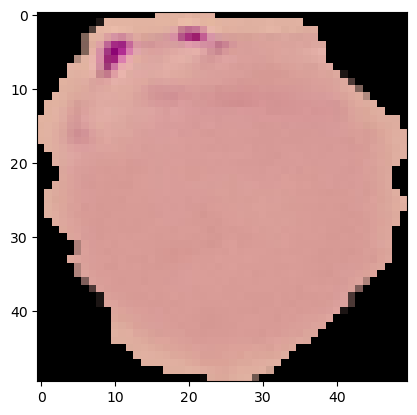

In [10]:
plt.imshow(data[2], cmap='gray')
plt.show()

In [11]:
len(data), len(labels)

(27558, 27558)

##### Répartition de l'ensemble de données



Les données traitées et mélangées sont désormais divisées en ensembles de formation, de validation et de test.

Une répartition de 80 %-10 %-10 % est suivie


In [12]:
X= np.array(data)
y= np.array(labels)
X, y = prep_dataset(X, y)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y)
X_test, X_val, Y_test, Y_val = train_test_split(X_test,Y_test, test_size=0.5, stratify=Y_test)

Y_test = np.argmax(Y_test, axis=1)

##### Modèle CNN

Question 1 : Proposez une differentes approche modèle CNN  pour résoudre ce problème.

NB: l'objectif est de Proposer differentes approche pour classifier les cellule infecter et non infecter

NB: Le modèle utilise l'optimiseur Adam, la précision étant la métrique


In [14]:
def create_cnn_model_1():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(50, 50, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120 , activation='relu'))
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model


In [15]:
def create_cnn_model_2():
    model = models.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2,activation='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model


In [16]:
def create_cnn_model_3():
    model=models.Sequential()
    model.add(Conv2D(32, (3,3), padding='same', activation='relu',input_shape=(50, 50, 3)))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model


In [17]:
def create_cnn_model_4():
    model=models.Sequential()
    model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(50, 50, 3)))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    
    model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model


Question 2: calculer le nombre de parametre pour chaque modele proposez

In [18]:
model1=create_cnn_model_1()
model1.summary()

C:\Users\iboug\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 19, 19, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1296)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       155,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        14,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,366 (716.27 KB)

 Trainable params: 183,366 (716.27 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model2=create_cnn_model_2()
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       331,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388,290 (1.48 MB)

 Trainable params: 388,290 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model3=create_cnn_model_3()
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │        92,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,470 (724.49 KB)

 Trainable params: 185,470 (724.49 KB)

 Non-trainable params: 0 (0.00 B)

Question 3: Utiliser les données pour entrainner les differents modele proposer

NB : Le modèle est entraîné pendant 10 époques avec une taille de lot de 64 en utilisant la précision comme métrique

In [21]:
model1 = create_cnn_model_1()
model1.fit(X_train , Y_train , validation_data=(X_val,Y_val), epochs=10, batch_size=64, verbose=2)

Epoch 1/10
345/345 - 18s - 51ms/step - accuracy: 0.6638 - loss: 0.6001 - val_accuracy: 0.8062 - val_loss: 0.4278
Epoch 2/10
345/345 - 14s - 40ms/step - accuracy: 0.8501 - loss: 0.3294 - val_accuracy: 0.8748 - val_loss: 0.2705
Epoch 3/10
345/345 - 13s - 39ms/step - accuracy: 0.9157 - loss: 0.2061 - val_accuracy: 0.9398 - val_loss: 0.1603
Epoch 4/10
345/345 - 13s - 39ms/step - accuracy: 0.9408 - loss: 0.1559 - val_accuracy: 0.9416 - val_loss: 0.1503
Epoch 5/10
345/345 - 13s - 39ms/step - accuracy: 0.9524 - loss: 0.1303 - val_accuracy: 0.9474 - val_loss: 0.1393
Epoch 6/10
345/345 - 13s - 38ms/step - accuracy: 0.9624 - loss: 0.1060 - val_accuracy: 0.9488 - val_loss: 0.1340
Epoch 7/10
345/345 - 21s - 60ms/step - accuracy: 0.9681 - loss: 0.0891 - val_accuracy: 0.9467 - val_loss: 0.1571
Epoch 8/10
345/345 - 14s - 40ms/step - accuracy: 0.9751 - loss: 0.0724 - val_accuracy: 0.9470 - val_loss: 0.1578
Epoch 9/10
345/345 - 13s - 39ms/step - accuracy: 0.9800 - loss: 0.0597 - val_accuracy: 0.9496 - 

In [22]:
model2 = create_cnn_model_2()
model2.fit(X_train , Y_train , validation_data=(X_val,Y_val), epochs=10, batch_size=64, verbose=2)

Epoch 1/10
345/345 - 35s - 100ms/step - accuracy: 0.7239 - loss: 0.5035 - val_accuracy: 0.9419 - val_loss: 0.1677
Epoch 2/10
345/345 - 31s - 89ms/step - accuracy: 0.9400 - loss: 0.1826 - val_accuracy: 0.9488 - val_loss: 0.1493
Epoch 3/10
345/345 - 31s - 90ms/step - accuracy: 0.9508 - loss: 0.1514 - val_accuracy: 0.9583 - val_loss: 0.1253
Epoch 4/10
345/345 - 31s - 90ms/step - accuracy: 0.9551 - loss: 0.1325 - val_accuracy: 0.9568 - val_loss: 0.1249
Epoch 5/10
345/345 - 42s - 121ms/step - accuracy: 0.9584 - loss: 0.1216 - val_accuracy: 0.9615 - val_loss: 0.1128
Epoch 6/10
345/345 - 31s - 91ms/step - accuracy: 0.9603 - loss: 0.1127 - val_accuracy: 0.9612 - val_loss: 0.1112
Epoch 7/10
345/345 - 31s - 90ms/step - accuracy: 0.9644 - loss: 0.1008 - val_accuracy: 0.9590 - val_loss: 0.1152
Epoch 8/10
345/345 - 40s - 115ms/step - accuracy: 0.9682 - loss: 0.0887 - val_accuracy: 0.9623 - val_loss: 0.1168
Epoch 9/10
345/345 - 31s - 89ms/step - accuracy: 0.9728 - loss: 0.0794 - val_accuracy: 0.9626

In [23]:
model3 = create_cnn_model_3()
model3.fit(X_train , Y_train , validation_data=(X_val,Y_val) , epochs=10, batch_size=64, verbose=2)

Epoch 1/10
345/345 - 69s - 201ms/step - accuracy: 0.7903 - loss: 0.4288 - val_accuracy: 0.9452 - val_loss: 0.1629
Epoch 2/10
345/345 - 65s - 189ms/step - accuracy: 0.9444 - loss: 0.1843 - val_accuracy: 0.9597 - val_loss: 0.1257
Epoch 3/10
345/345 - 66s - 192ms/step - accuracy: 0.9508 - loss: 0.1664 - val_accuracy: 0.9626 - val_loss: 0.1166
Epoch 4/10
345/345 - 64s - 186ms/step - accuracy: 0.9548 - loss: 0.1499 - val_accuracy: 0.9626 - val_loss: 0.1157
Epoch 5/10
345/345 - 64s - 185ms/step - accuracy: 0.9555 - loss: 0.1479 - val_accuracy: 0.9626 - val_loss: 0.1228
Epoch 6/10
345/345 - 64s - 186ms/step - accuracy: 0.9565 - loss: 0.1387 - val_accuracy: 0.9655 - val_loss: 0.1116
Epoch 7/10
345/345 - 64s - 186ms/step - accuracy: 0.9563 - loss: 0.1372 - val_accuracy: 0.9673 - val_loss: 0.1047
Epoch 8/10
345/345 - 64s - 185ms/step - accuracy: 0.9594 - loss: 0.1324 - val_accuracy: 0.9663 - val_loss: 0.1041
Epoch 9/10
345/345 - 64s - 186ms/step - accuracy: 0.9589 - loss: 0.1291 - val_accuracy: 

Question 4:  utilisé le modele optimale pour prédire   l'ensemble de test.

87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
Accuracy: 0.9568


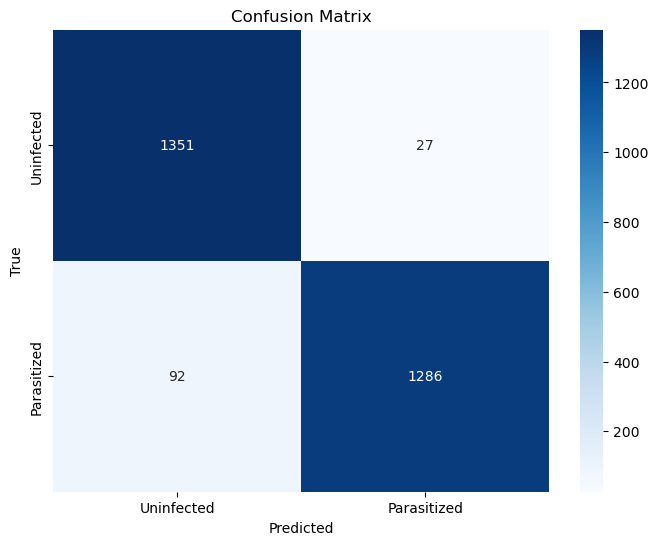

In [24]:
predictions = model3.predict(X_test)
# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
# Calculate accuracy
accuracy = accuracy_score(Y_test, predicted_classes)
print(f'Accuracy: {accuracy:.4f}')
# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, predicted_classes)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [80]:
#sauvegarder le modèle complet
model3.save('Cell_img.h5')

Question 5 :  Determiner les métriques d’évaluation et tracer la courbe de validation.

In [25]:
from keras.utils import to_categorical

# Vérifiez et convertissez Y_test si nécessaire
if len(Y_test.shape) == 1:  # Si Y_test est 1D
    Y_test = to_categorical(Y_test, num_classes=2)

# Évaluez le modèle
test_loss, test_accuracy = model3.evaluate(X_test, Y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

Test Accuracy: 0.96
Test Loss: 0.12


Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 64s 93ms/step - accuracy: 0.9560 - loss: 0.1356 - val_accuracy: 0.9663 - val_loss: 0.1053
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 72s 104ms/step - accuracy: 0.9572 - loss: 0.1294 - val_accuracy: 0.9648 - val_loss: 0.1082
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 68s 98ms/step - accuracy: 0.9592 - loss: 0.1239 - val_accuracy: 0.9670 - val_loss: 0.1084
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 65s 94ms/step - accuracy: 0.9628 - loss: 0.1143 - val_accuracy: 0.9652 - val_loss: 0.1105
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 68s 99ms/step - accuracy: 0.9619 - loss: 0.1135 - val_accuracy: 0.9644 - val_loss: 0.1080
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 65s 94ms/step - accuracy: 0.9595 - loss: 0.1195 - val_accuracy: 0.9630 - val_loss: 0.1100
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 60s 88ms/step - accuracy: 0.9623 - loss: 0.1087 - val_accuracy: 0.9637 - val_loss: 0.1124
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 61s 88ms/step - accuracy: 0.9619 - loss: 0.1071 -

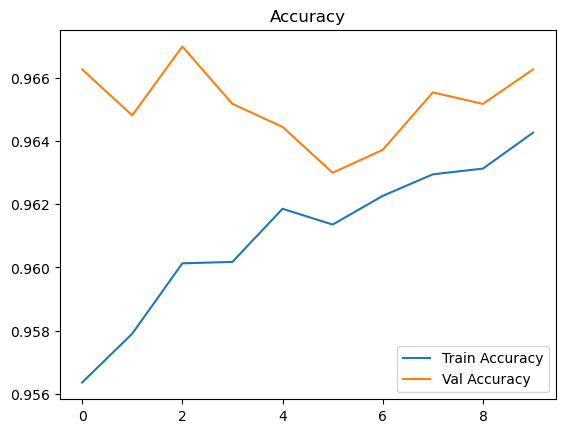

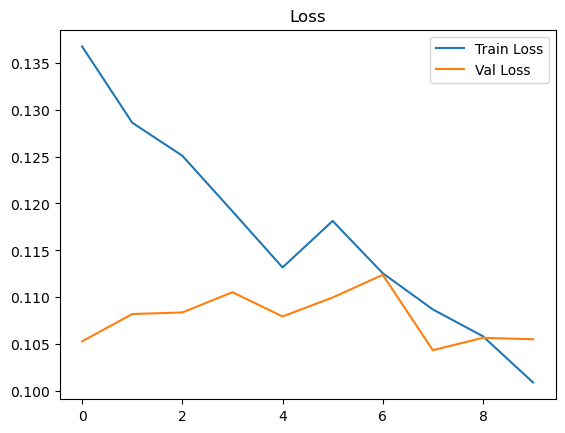

In [26]:
# existing code...
history3 = model3.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val))
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Exercice 2

##### Definition des constants

In [46]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

##### Prepation des données

In [47]:
root = "./PetImages/"
cat= "Cat/"
dog= "Dog/"

In [48]:
Cat= os.listdir(root+cat)
Dog= os.listdir(root+dog)

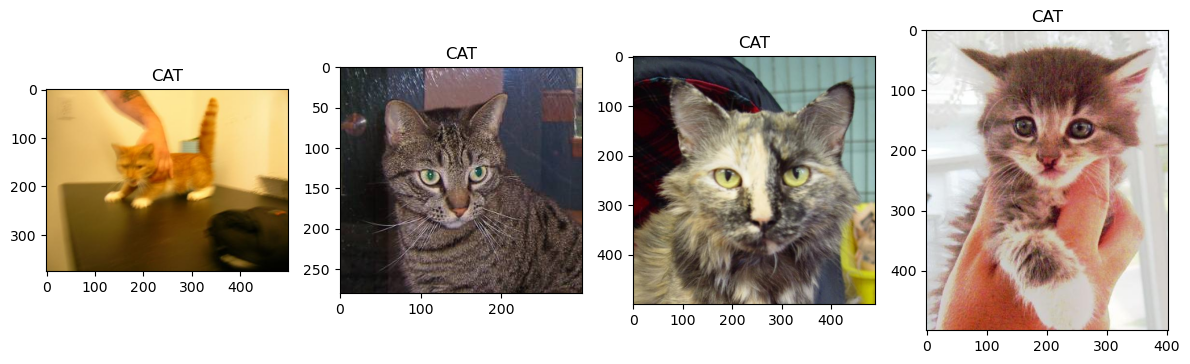

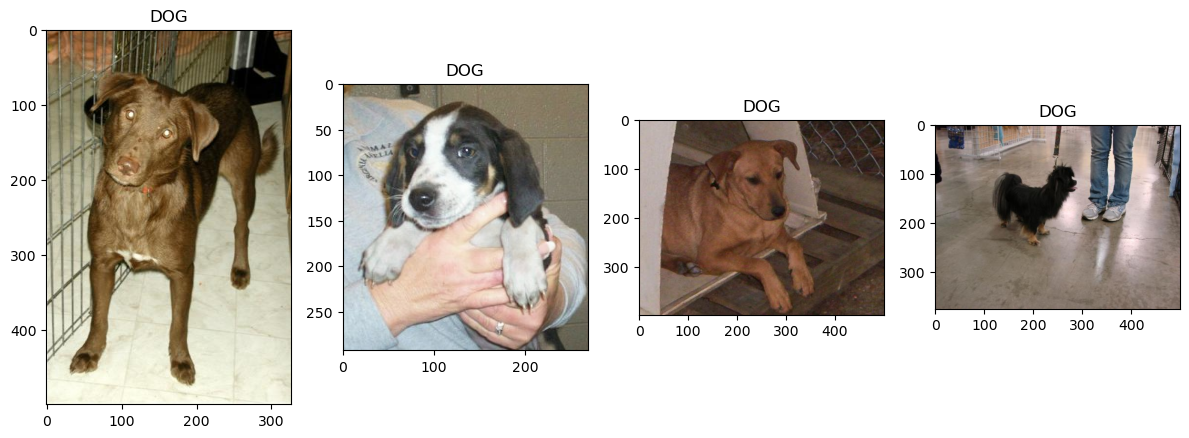

In [30]:
plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(root+cat + Cat[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title('CAT')
    plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 12))
for i in range(4):
    plt.subplot(2, 4, i+1)
    img = cv2.imread(root+dog + Dog[i+1])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title('DOG')
    plt.tight_layout()
plt.show()

In [49]:
# 1. Création du DataFrame
filenames = []
categories = []
# Parcours des sous-dossiers (cat et dog)
for class_name in ['cat', 'dog']:
    class_dir = os.path.join(root, class_name)
    for filename in os.listdir(class_dir):
        filenames.append(os.path.join(class_name, filename)) # Garde le sous-dossier dans le chemin
        categories.append(1 if class_name == 'dog' else 0)
     

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [50]:
df = df.sample(frac=1).reset_index(drop=True)  # Mélange tout le DataFrame

In [51]:
df.head()

,filename,category
0,cat\9118.jpg,0
1,cat\7967.jpg,0
2,cat\12337.jpg,0
3,dog\8156.jpg,1
4,cat\8301.jpg,0


In [52]:
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['category'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['category'], random_state=42)
# => 70% train, 15% val, 15% test

In [53]:
def filter_bad_images(df, root):
    from PIL import Image
    good_rows = []
    for idx, row in df.iterrows():
        img_path = os.path.join(root, row['filename'])
        try:
            with Image.open(img_path) as img:
                img.verify()
            good_rows.append(row)
        except Exception:
            print(f"Image ignorée: {img_path}")
    return pd.DataFrame(good_rows)

train_df = filter_bad_images(train_df, root)
val_df = filter_bad_images(val_df, root)

Image ignorée: ./PetImages/cat\Thumbs.db
Image ignorée: ./PetImages/cat\666.jpg


c:\ProgramData\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Image ignorée: ./PetImages/dog\Thumbs.db
Image ignorée: ./PetImages/dog\11702.jpg


In [57]:
# Conversion de la colonne 'category' en string
train_df['category'] = train_df['category'].astype(str)
val_df['category'] = val_df['category'].astype(str)
test_df['category'] = test_df['category'].astype(str)

In [58]:
len(categories), len(filenames)

(25002, 25002)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25002 entries, 0 to 25001
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  25002 non-null  object
 1   category  25002 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Générateur avec augmentation pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Générateur pour la validation et le test
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Préparation des générateurs
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=root,
    x_col='filename',
    y_col='category',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    directory=root,
    x_col='filename',
    y_col='category',
    target_size=(128, 128),
    class_mode='binary',
    batch_size=32
)

test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    directory=root,
    x_col='filename',
    y_col='category',
    target_size=(128, 128), 
    class_mode='binary', 
    batch_size=32,
    shuffle=False
)


Found 17497 validated image filenames belonging to 2 classes.
Found 3750 validated image filenames belonging to 2 classes.
Found 3751 validated image filenames belonging to 2 classes.


Text(0.5, 1.0, 'Distribution of Classes')

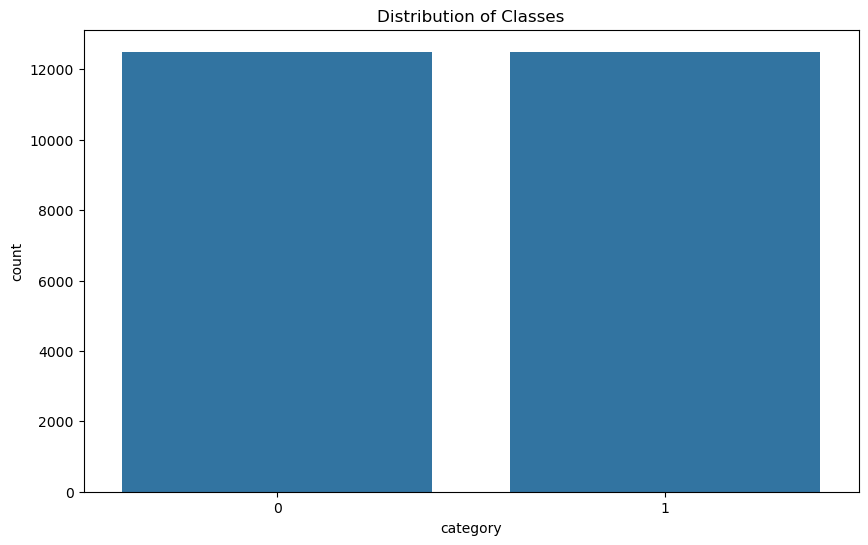

In [60]:
# Représentation par countplot des données
plt.figure(figsize=(10, 6))
# Utiliser la colonne correcte 'category' au lieu de 'class'
sns.countplot(x='category', data=df)
plt.title('Distribution of Classes')

# création du modèle

Nous définissons l'architecture du CNN comme suit:
Soit une image de dimension IMAGE_SIZE
Une premiere couche composer de 32 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 70 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 128 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 512 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 512 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une couche de  sortie avec  fonction d'actvation softmax.


# Questions

Question 1 : Quelle est le type de cette classification?\
Question 2 : Implémenter le réseau convolutif\
Question 3 : Calculer le nombres de paramètres\
Question 4 : Quel rôle joue la méthode dropout dans un réseau de neurone convolitif\


# 1.Le type de classification:
##### Classification binaire puise qu'on ne predis que deux classes (chien ou chat)

# 2.Implementation du modele convolutif

In [61]:
def create_cnn_model_3():
    model=models.Sequential()
    model.add(Conv2D(32, (3,3), activation='relu',input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(70, (3,3) , activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))
    model.add(Conv2D(512, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model


In [62]:
model = create_cnn_model_3()

C:\Users\iboug\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=val_generator , verbose=2
)


C:\Users\iboug\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


c:\ProgramData\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


547/547 - 696s - 1s/step - accuracy: 0.5880 - loss: 0.6621 - val_accuracy: 0.6603 - val_loss: 0.6287
Epoch 2/5
547/547 - 695s - 1s/step - accuracy: 0.6570 - loss: 0.6174 - val_accuracy: 0.7456 - val_loss: 0.5260
Epoch 3/5
547/547 - 689s - 1s/step - accuracy: 0.7045 - loss: 0.5602 - val_accuracy: 0.7624 - val_loss: 0.4770
Epoch 4/5
547/547 - 708s - 1s/step - accuracy: 0.7312 - loss: 0.5370 - val_accuracy: 0.7936 - val_loss: 0.4468
Epoch 5/5
547/547 - 776s - 1s/step - accuracy: 0.7486 - loss: 0.5119 - val_accuracy: 0.7936 - val_loss: 0.4319


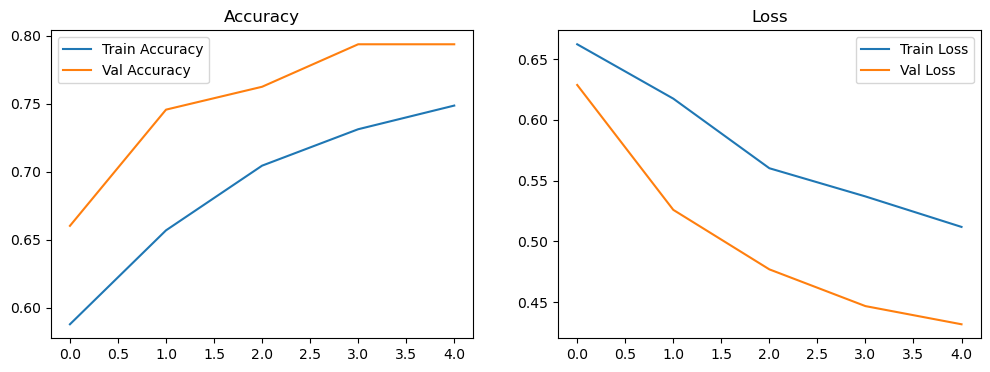

In [64]:
# Visualisation des performances du modèle
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [65]:
# Évaluez le modèle
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

118/118 ━━━━━━━━━━━━━━━━━━━━ 55s 465ms/step - accuracy: 0.7804 - loss: 0.4595

Test Accuracy: 0.7779
Test Loss: 0.4544


In [68]:
# sauvegarder le modèle complet
model.save('CAT_DOG.h5')

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


# ===================================================================
# 4. Création du modèle pré-entraîné
# ===================================================================
def create_transfer_learning_model():
    # Charger EfficientNetB0 pré-entraîné sans les couches fully-connected
    base_model = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
        pooling='avg'
    )
    
    # Geler les couches du modèle de base
    base_model.trainable = False
    
    # Construire le modèle de transfert learning
    inputs = base_model.input
    x = base_model.output
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, outputs)
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

model = create_transfer_learning_model()
model.summary()

# ===================================================================
# 5. Entraînement initial
# ===================================================================
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks
)

# ===================================================================
# 6. Fine-tuning (réglage fin)
# ===================================================================
def unfreeze_model(model):
    # Dégeler les couches supérieures d'EfficientNet
    for layer in model.layers[-20:]:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = True
    
    # Récompiler avec un learning rate plus faible
    model.compile(
        optimizer=Adam(learning_rate=1e-5),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

unfreeze_model(model)

# Entraînement avec fine-tuning
history_fine = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    initial_epoch=history.epoch[-1],
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks
)

# ===================================================================
# 7. Évaluation finale
# ===================================================================
# Charger le meilleur modèle
model.load_weights('best_model.h5')

# Évaluation sur le test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Prédictions et matrice de confusion
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)
y_true = test_generator.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Model: "functional_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_9 (Cast)                   │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,892,772 (22.48 MB)

 Trainable params: 5,127,833 (19.56 MB)

 Non-trainable params: 764,939 (2.92 MB)


=== Phase 1: Entraînement initial ===
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.6101 - auc: 0.6647 - loss: 0.8949 - precision: 0.6190 - recall: 0.6331  

2/2 ━━━━━━━━━━━━━━━━━━━━ 116s 21s/step - accuracy: 0.6052 - auc: 0.6510 - loss: 0.9199 - precision: 0.6096 - recall: 0.6284 - val_accuracy: 0.4444 - val_auc: 0.5000 - val_loss: 0.8934 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 3.0000e-04
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 44s 33s/step - accuracy: 0.5492 - auc: 0.5197 - loss: 1.3761 - precision: 0.6256 - recall: 0.5893 - val_accuracy: 0.4444 - val_auc: 0.5000 - val_loss: 0.8916 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 3.0000e-04
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 56s 24s/step - accuracy: 0.5947 - auc: 0.5859 - loss: 1.1495 - precision: 0.5679 - recall: 0.7206 - val_accuracy: 0.4444 - val_auc: 0.4750 - val_loss: 0.8885 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 3.0000e-04
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 88s 26s/step - accuracy: 0.4633 - auc: 0.5274 - loss: 1.1240 - precision: 0.4471 - recall: 0.3373 - val_accuracy: 0.4444 - val_auc: 0.4000 - val_loss: 0


[Performance finale sur le test set]
Accuracy: 0.5556
Precision: 0.0000
Recall: 0.0000
AUC: 0.5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step

[Classification Report]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.00      0.00      0.00         4

    accuracy                           0.56         9
   macro avg       0.28      0.50      0.36         9
weighted avg       0.31      0.56      0.40         9



c:\Users\iboug\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\iboug\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\iboug\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


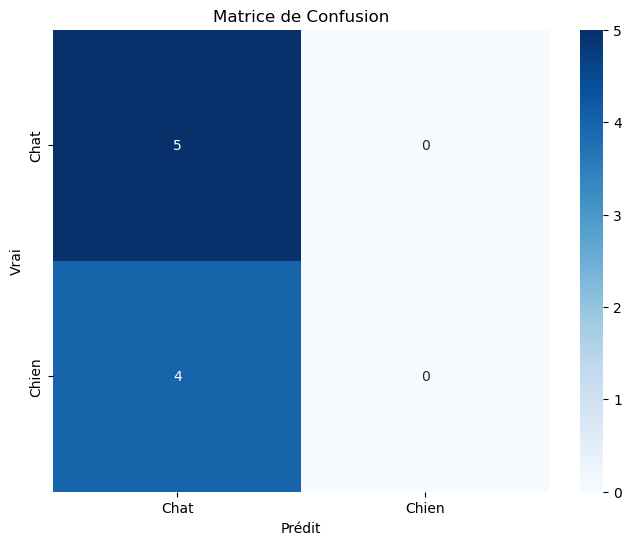

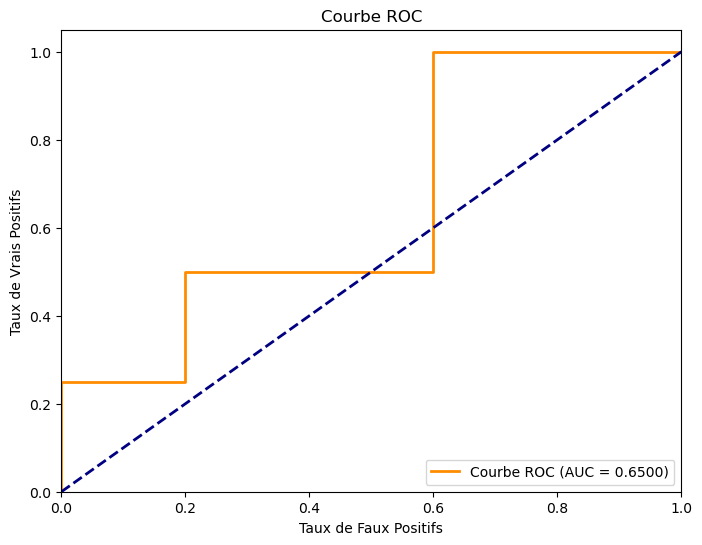

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.mixed_precision import set_global_policy


# ===================================================================
# 3. Modèle EfficientNetB0 optimisé
# ===================================================================
def build_optimized_model():
    # Charger EfficientNetB0 pré-entraîné
    base_model = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=(*IMAGE_SIZE, 3),
        pooling='avg'
    )
    
    # Geler stratégiquement les couches
    for layer in base_model.layers[:150]:
        layer.trainable = False
    
    # Construction du modèle
    inputs = tf.keras.Input(shape=(*IMAGE_SIZE, 3))
    x = base_model(inputs)
    
    # Tête de classification améliorée avec régularisation
    x = layers.Dense(1024, activation='relu', kernel_regularizer=l2(WEIGHT_DECAY))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.6)(x)
    
    x = layers.Dense(512, activation='relu', kernel_regularizer=l2(WEIGHT_DECAY))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    
    # Sortie en float32 pour stabilité
    outputs = layers.Dense(1, activation='sigmoid', dtype='float32')(x)
    
    model = tf.keras.Model(inputs, outputs)
    
    # Optimiseur Adam avec gradient clipping
    optimizer = Adam(
        learning_rate=INIT_LR,
        clipnorm=1.0  # Prévention des explosions de gradient
    )
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), 
                 tf.keras.metrics.Recall(name='recall'), 
                 tf.keras.metrics.AUC(name='auc')]
    )
    
    return model

model = build_optimized_model()
model.summary()

# ===================================================================
# 4. Callbacks avancés
# ===================================================================
callbacks = [
    EarlyStopping(
        monitor='val_auc',
        patience=10,
        mode='max',
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        'best_model.h5',
        monitor='val_auc',
        save_best_only=True,
        mode='max'
    )
]

# ===================================================================
# 5. Entraînement en deux phases
# ===================================================================
# Phase 1: Entraînement initial
print("\n=== Phase 1: Entraînement initial ===")
history1 = model.fit(
    train_generator,
    epochs=5,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks
)

# Phase 2: Fine-tuning complet
print("\n=== Phase 2: Fine-tuning ===")
for layer in model.layers[1].layers:  # Déverrouiller le modèle de base
    layer.trainable = True

# Récompiler avec un LR plus faible
model.compile(
    optimizer=Adam(
        learning_rate=INIT_LR/10,
        clipnorm=1.0
    ),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall', 'auc']
)

history2 = model.fit(
    train_generator,
    epochs=5,
    initial_epoch=history1.epoch[-1] + 1,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks
)

# ===================================================================
# 6. Évaluation finale
# ===================================================================
# Charger le meilleur modèle
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.layers import Layer



# Définir une couche personnalisée pour 'Cast'
class CastLayer(Layer):
    def call(self, inputs):
        return tf.cast(inputs, tf.float32)

# Charger le modèle avec la couche personnalisée
model = tf.keras.models.load_model(
    'best_model.h5',
    custom_objects={
        'Cast': CastLayer  # Remplacez par la définition correcte
    },
    compile=False
)

#Compiler le modèle
model.compile(
    optimizer=Adam(learning_rate=1e-6),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall(), AUC()]
)

# Évaluer le modèle
test_results = model.evaluate(test_generator, verbose=0)
print("\n[Performance finale sur le test set]")
print(f"Accuracy: {test_results[1]:.4f}")
print(f"Precision: {test_results[2]:.4f}")
print(f"Recall: {test_results[3]:.4f}")
print(f"AUC: {test_results[4]:.4f}")

# Prédictions et analyse
y_true = test_generator.classes
y_pred = model.predict(test_generator).flatten()
y_pred_binary = (y_pred > 0.5).astype(int)

# Rapport de classification
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("\n[Classification Report]")
print(classification_report(y_true, y_pred_binary))

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Chat', 'Chien'], 
            yticklabels=['Chat', 'Chien'])
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.title('Matrice de Confusion')
plt.show()

# Courbe ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

# 3. Calculer le nombres de paramètres

In [ ]:
model = create_cnn_model_3()
model.summary()

c:\Users\iboug\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 61, 61, 70)     │        20,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 30, 30, 70)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 30, 30, 70)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 512)    │       323,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │       100,353 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 444,551 (1.70 MB)

 Trainable params: 444,551 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

# 4. Le rôle joue la méthode dropout dans un réseau de neurone convolitif

### Le Dropout est une technique permettant de réduire l’overfitting lors de l’entraînement du modèle .
 ### Il consiste a désactive temporairement certains neurones dans le réseau ainsi que toutes ses connexions entrantes et sortantes.

# Exercice 3

Les réseaux de neurones convolutionnels classiques sont généralement composés d’une succession de couches de convolutions (avec ReLU) avec de plus en plus de filtres,  et dont la dimension spatiale est progressivement réduite par des couches de max pooling possiblement jusqu’à aggregation totale des dimensions spatiales,\
 il ne reste donc plus que la "profondeur" correspondant au nombre de filtres appliqués par la dernière convolution (1 × 1 × C).
 On y ajoute enfin généralement une ou quelques couches linéaires (appelées fully-connected).

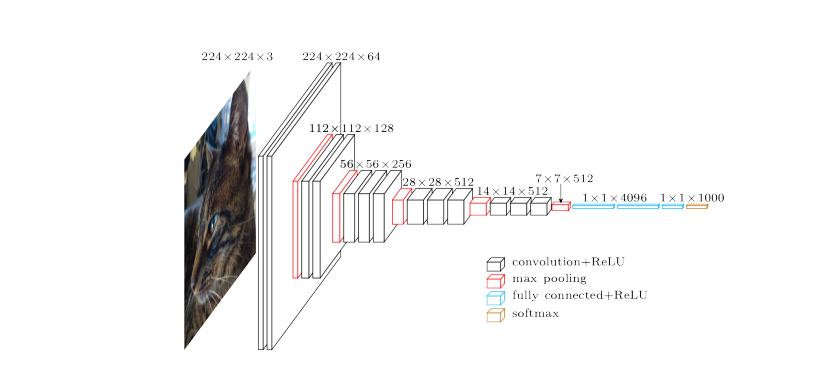

Considérant un seul filtre de convolution de padding p, de stride s et de taille de kernel k, pour une
entrée de taille x × y × z quelle sera la taille de sortie ?\
Combien y a-t-il de parametres à apprendre ?\
Combien de parametres aurait-il fallu apprendre si une couche fully-connected devait produire une sortie de
la même taille ?


Quel interêt voyez-vous à l’usage du max pooling ?

Implementer ce reseau convolutif

# 1. La taille de sortie
### Convolution (padding=1, stride=1, kernel=3)
### Couche 1 : Conv2d (3 → 64)
**Entrée :** `224×224×3`
**Sortie :**
$$
\left\lfloor \frac{224 + 2 \times 1 - 3}{1} \right\rfloor + 1 = 224 \quad \Rightarrow \quad 224 \times 224 \times 64
$$

### MaxPooling (kernel=2, stride=2)
**Sortie :**
$$
\left\lfloor \frac{224 - 2}{2} \right\rfloor + 1 = 112 \quad \Rightarrow \quad 112 \times 112 \times 64
$$
### Couche 2 : Conv2d (64 → 128)
**Entrée :** `112×112×64`  

#### Convolution (kernel=3, padding=1, stride=1)
**Sortie :**
$$
\left\lfloor \frac{112 + 2 \times 1 - 3}{1} \right\rfloor + 1 = 112 \quad \Rightarrow \quad 112 \times 112 \times 128
$$

#### MaxPooling (kernel=2, stride=2)
**Sortie :**
$$
\left\lfloor \frac{112 - 2}{2} \right\rfloor + 1 = 56 \quad \Rightarrow \quad 56 \times 56 \times 128
$$
### Couche 3 : Conv2d (128 → 256)
**Entrée :** `56×56×128`  

#### Convolution (kernel=3, padding=1, stride=1)
**Sortie :**
$$
\left\lfloor \frac{56 + 2 \times 1 - 3}{1} \right\rfloor + 1 = 56 \quad \Rightarrow \quad 56 \times 56 \times 256
$$

#### MaxPooling (kernel=2, stride=2)
**Sortie :**
$$
\left\lfloor \frac{56 - 2}{2} \right\rfloor + 1 = 28 \quad \Rightarrow \quad 28 \times 28 \times 256
$$
### Couche 4 : Conv2d (256 → 512)
**Entrée :** `28×28×256`  

#### Convolution (kernel=3, padding=1, stride=1)
**Sortie :**
$$
\left\lfloor \frac{28 + 2 \times 1 - 3}{1} \right\rfloor + 1 = 28 \quad \Rightarrow \quad 28 \times 28 \times 512
$$

#### MaxPooling (kernel=4, stride=4)
**Sortie :**
$$
\left\lfloor \frac{28 - 4}{4} \right\rfloor + 1 = 7 \quad \Rightarrow \quad 7 \times 7 \times 512
$$

# 2 . Le nombre de parametres a apprendre
$$
\underbrace{(3 \times 3 \times 256)}_{\text{Poids par filtre}} \times \underbrace{512}_{\text{Filtres}} + \underbrace{512}_{\text{Biais}} = 1,\!180,\!160
$$
# 3. Le nombre de parametres pour la couche fully_connected
### Flatten (7×7×512 → 25 088)
**Calcul :**
$$
7 \times 7 \times 512 = 25,\!088
$$




# 4. Quel interêt voyez-vous à l’usage du max pooling ?

## L'interet de max pooling  est de réduire la taille des images, tout en préservant leurs caractéristiques importantes.

# 5.Implementer le reseau de convolutif


In [ ]:

def build_cnn(input_shape=(224, 224, 3), num_classes=1000):
    model = models.Sequential(name="CNN_Classification")
    
    # Bloc 1: Conv(64) + ReLU + MaxPooling
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2), strides=2))  # 224x224 → 112x112
    
    # Bloc 2: Conv(128) + ReLU + MaxPooling
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))  # 112x112 → 56x56
    
    # Bloc 3: Conv(256) + ReLU + MaxPooling
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))  # 56x56 → 28x28
    
    # Bloc 4: Conv(512) + ReLU + MaxPooling
    model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((4, 4), strides=4))  # 28x28 → 7x7
    
    # Couches Fully-Connected
    model.add(layers.Flatten())  # 7x7x512 → 25088
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes))
    
    # Couche de sortie (softmax pour classification)
    model.add(layers.Activation('softmax'))
    # Compilation (à adapter selon votre cas d'usage)
    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    return model




# Exercice 4

Nous allons désormais implémenter notre premier réseau convolutionnel que nous allons appliquer à la
base de données CIFAR-10 (Krizhevsky, 2009, c.f. Figure 3). Cette base d’images RGB de 32×32 pixels
comporte 10 classes, 50k images en train et 10k images en test.


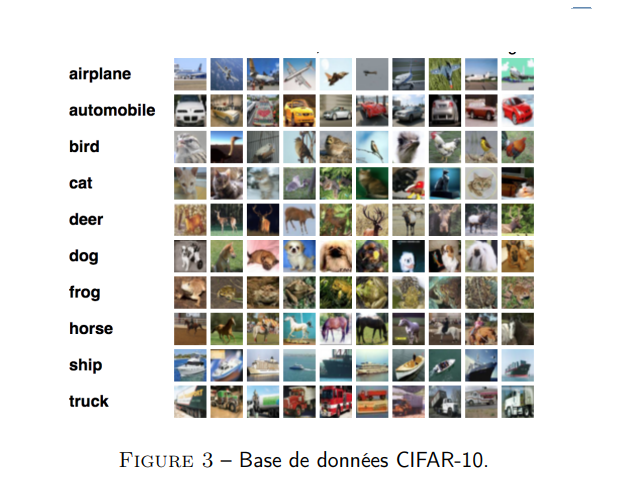

Le réseau que nous allons implémenter a un style proche de l’architecture AlexNet de Krizhevsky et al.\
(2012) adaptée à la base CIFAR-10 dont les images sont plus petites. Il sera composé des couches suivantes :\
— conv1 : 32 convolutions 5×5, suivie de ReLU \
— pool1 : max-pooling 2×2 \
— conv2 : 64 convolutions 5×5, suivie de ReLU \
— pool2 : max-pooling 2×2 \
— conv3 : 64 convolutions 5×5, suivie de ReLU \
— pool3 : max-pooling 2×2 \
— fc4 : fully-connected, 1000 neurones en sortie, suivie de ReLU \
— fc5 : fully-connected, 10 neurones en sortie, suivie de softmax

# Question

## Implementer ce réseau convolutif


In [69]:
def model_cnn4():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(10, activation='softmax'))  
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [70]:
#Importation du bibliothèque Keras pour les jeux de données CIFAR-10
from keras.datasets import cifar10
# Chargement du jeu de données CIFAR-10
(X_train, y_train), (X_test, y_test)= cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 130s 1us/step


In [71]:
(X_train.shape,y_train.shape)

((50000, 32, 32, 3), (50000, 1))

In [72]:
(X_test.shape, y_test.shape)

((10000, 32, 32, 3), (10000, 1))

In [73]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

### Affichage du datasets Cifar

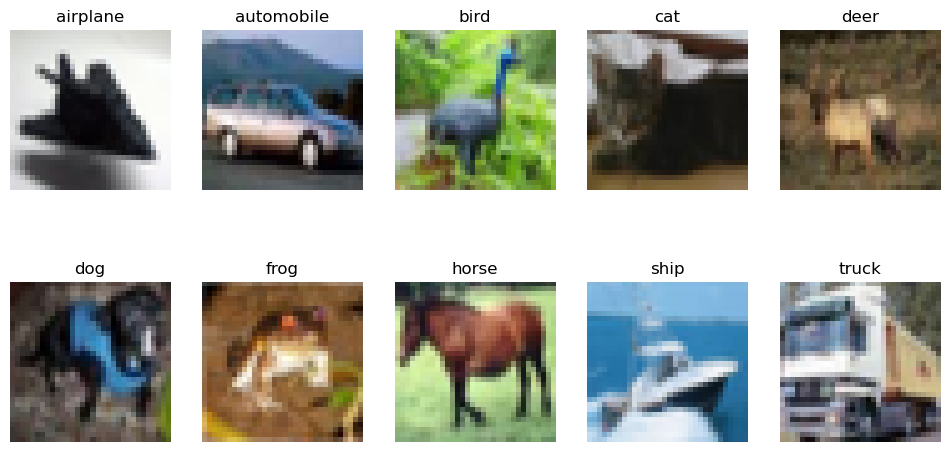

In [74]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

images = [X_train[(y_train.flatten() == i).argmax()] for i in range(10)]


plt.figure(figsize=(12, 6))
for i, image in enumerate(images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')

In [75]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [76]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [77]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

model = model_cnn4()
history= model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
              callbacks=[early_stop],
              batch_size=batch_size,
             )

C:\Users\iboug\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\iboug\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 122s 76ms/step - accuracy: 0.2839 - loss: 1.9016 - val_accuracy: 0.4726 - val_loss: 1.4692
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:07 81ms/step - accuracy: 0.3750 - loss: 1.6555

C:\Users\iboug\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3750 - loss: 1.6555 - val_accuracy: 0.4677 - val_loss: 1.4654
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 113s 73ms/step - accuracy: 0.4727 - loss: 1.4623 - val_accuracy: 0.5363 - val_loss: 1.2959
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4062 - loss: 1.4582 - val_accuracy: 0.5297 - val_loss: 1.3156
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 168s 108ms/step - accuracy: 0.5197 - loss: 1.3428 - val_accuracy: 0.5683 - val_loss: 1.2075
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5625 - loss: 1.0867 - val_accuracy: 0.5679 - val_loss: 1.2135
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.5519 - loss: 1.2586 - val_accuracy: 0.5733 - val_loss: 1.1981
Epoch 8/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5625 - loss: 1.2990 - val_accuracy: 0.5721 - val_loss: 1.1976
Epoch 9/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.5712 - loss: 1.2123

In [79]:
#sauvegarder le modèle complet
model.save('CIFAR10_CNN.h5')

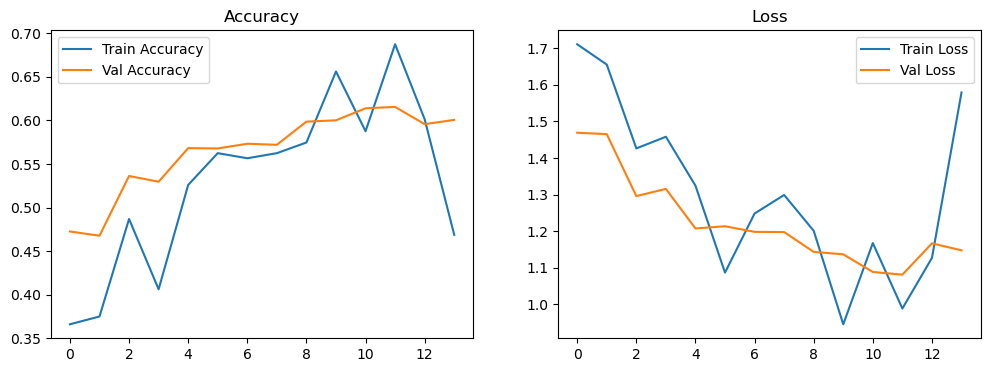

In [78]:
# Visualisation des performances du modèle
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

## 1. Pour les convolutions, on veut conserver en sortie les mêmes dimensions spatiales qu’en entrée.
 $$
Sortie = \left\lfloor \frac{Entrée + 2p - k}{s} \right\rfloor + 1
$$  

- Taille du kernel k = 5  

On cherche p tel que la sortie = entrée  

Choisissons s = 1 (stride de 1)  

Alors :  

$$
Entrée = \frac{Entrée + 2p - 5}{1} + 1 \Rightarrow 2p = 4 \Rightarrow p = 2
$$  

 Donc, pour les convolutions, on choisit :  
- Padding = 2  
- Stride = 1

## 2.Pour les max poolings, on veut réduire les dimensions spatiales d’un facteur 2.
$$
Sortie = \left\lfloor \frac{Entrée + 2p - k}{s} \right\rfloor + 1
$$  
- Taille du kernel (k) = 2  
- Stride (s) = 2  
- Padding (p) = 0  

Vérification :  
$$
Sortie = \left\lfloor \frac{Entrée + 0 - 2}{2} \right\rfloor + 1 = \left\lfloor \frac{Entrée - 2}{2} \right\rfloor + 1 = \frac{Entrée}{2}
$$  

Donc, pour les max-pooling, on choisit :  
- Kernel = 2  
- Stride = 2  
- Padding = 0  


## 3.Pour chaque couche, indiquer la taille de sortie et le nombre de poids à apprendre.


| Couche     | Taille de sortie        | Paramètres à apprendre       |
|------------|--------------------------|-------------------------------|
| **conv1**  | 32×32×32                 | (5×5×3)×32 + 32 = **2,432**   |
| **pool1**  | 16×16×32                 | 0                             |
| **conv2**  | 16×16×64                 | (5×5×32)×64 + 64 = **51,264** |
| **pool2**  | 8×8×64                   | 0                             |
| **conv3**  | 8×8×64                   | (5×5×64)×64 + 64 = **102,464**|
| **pool3**  | 4×4×64                   | 0                             |
| **fc4**    | 1000                     | 1024×1000 + 1000 = **1,025,000** |
| **fc5**    | 10                       | 1000×10 + 10 = **10,010**     |

###  **Total paramètres à apprendre** : **1,191,170**








## 4. Commentez cette répartition
- **Convolutions** : ~156,000 poids (**~13%**)
- **Fully-connected** : ~1,035,000 poids (**~87%**)

Les couches **fully-connected** sont majoritairement responsables de la complexité du modèle, ce qui est courant dans les architectures classiques.  
Elles nécessitent donc davantage de **régularisation** (comme *dropout*, *batch normalization*, etc.) pour limiter le surapprentissage (*overfitting*).


## 5. Quel est donc le nombre total de poids à apprendre

### nbre total de parametres=conv1+conv2+conv3+conv3+fc4+fc5

####    nbre total de parametres=1,191,170


## 6. Comparer cela au nombre d’exemples
### Ratio paramètres / exemples

- **Nombre total de paramètres** : 1,191,170  
- **Nombre d'exemples dans CIFAR-10** : 50,000

**Ratio = 1,191,170 / 50,000 ≈ 23,8 paramètres par exemple**

Cela signifie que **chaque exemple d'entraînement porte en moyenne 23,8 paramètres** du modèle à ajuster.  
Un ratio élevé comme celui-ci souligne l'importance d'utiliser des techniques de **régularisation** (*dropout*, *data augmentation*, etc.) pour éviter le surapprentissage (*overfitting*).

